In [1]:
import generate_masterdf as gm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from generate_plots import subject_wise_error_plot, quick_visualization, distribution_plots
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

We have 5 subjects so far: ['sub01', 'sub03', 'sub06', 'sub15', 'sub16']

Loading existing dataframe! If this is not desired, delete the current mater_df.csv


In [2]:
df = gm.master_df
print('Dataframe description')
df.info()

Dataframe description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subjID                6000 non-null   int64  
 1   day                   6000 non-null   int64  
 2   tnum                  6000 non-null   int64  
 3   rnum                  6000 non-null   int64  
 4   istms                 6000 non-null   int64  
 5   ispro                 6000 non-null   int64  
 6   instimVF              6000 non-null   int64  
 7   breakfix              6000 non-null   int64  
 8   no_prim_sacc          6000 non-null   int64  
 9   small_sacc            6000 non-null   int64  
 10  large_error           6000 non-null   int64  
 11  rejtrials             6000 non-null   int64  
 12  TarX                  6000 non-null   float64
 13  TarY                  6000 non-null   float64
 14  isaccX                5800 non-null   float64
 15 

In [3]:
df.describe()

subjID        day       tnum       rnum      istms   ispro  \
count  6000.0000  6000.0000  6000.0000  6000.0000  6000.0000  6000.0   
mean      8.2000     2.0000    20.5000     5.5000     0.6667     0.5   
std       6.1779     0.8166    11.5444     2.8725     0.4714     0.5   
min       1.0000     1.0000     1.0000     1.0000     0.0000     0.0   
25%       3.0000     1.0000    10.7500     3.0000     0.0000     0.0   
50%       6.0000     2.0000    20.5000     5.5000     1.0000     0.5   
75%      15.0000     3.0000    30.2500     8.0000     1.0000     1.0   
max      16.0000     3.0000    40.0000    10.0000     1.0000     1.0   

       instimVF   breakfix  no_prim_sacc  small_sacc  large_error  rejtrials  \
count    6000.0  6000.0000     6000.0000   6000.0000    6000.0000  6000.0000   
mean        0.5     0.0950        0.0215      0.0118       0.0222     0.0437   
std         0.5     0.2932        0.1451      0.1081       0.1472     0.2044   
min         0.0     0.0000        0.0000      0.0000       0.0000     0.0000   
25%         0.0     0.0000        0.0000      0.0000       0.0000     0.0000   
50%         0.5     0.0000        0.0000      0.0000       0.0000     0.0000   
75%         1.0     0.0000        0.0000      0.0000       0.0000     0.0000   
max         1.0     1.0000        1.0000      1.0000       1.0000     1.0000   

             TarX       TarY     isaccX     isaccY     fsaccX     fsaccY  \
count  6.0000e+03  6000.0000  5800.0000  5800.0000  5871.0000  5871.0000   
mean   2.5757e-17    -4.1819     0.1422    -3.8931    -0.0650    -4.0715   
std    1.3951e+01     3.2101    14.0138     3.1874    13.9227     3.2281   
min   -1.7780e+01   -13.4041   -22.5663   -26.9461   -19.5855   -32.6684   
25%   -1.4037e+01    -4.8167   -13.8239    -5.0603   -13.9950    -5.0971   
50%    0.0000e+00    -3.9084    -1.2096    -3.6342    -0.3296    -3.7404   
75%    1.4037e+01    -2.4771    14.2664    -2.1027    13.8274    -2.3166   
max    1.7780e+01     4.4038    22.9109     9.6022    20.0882    13.9516   

       isacc_err  fsacc_err  isacc_theta_err  fsacc_theta_err  \
count  5800.0000  5871.0000        5800.0000        5871.0000   
mean      2.2749     1.8293           0.0436           0.0338   
std       3.3531     3.3191           0.4153           0.4005   
min       0.0208     0.0208          -2.8857          -2.8608   
25%       0.8823     0.6468          -0.0318          -0.0283   
50%       1.5457     1.1719           0.0073           0.0039   
75%       2.5194     1.9082           0.0505           0.0387   
max      38.9014    36.6431           3.1389           3.1389   

       corrected_theta_err  isacc_radius_err  fsacc_radius_err  \
count            5800.0000         5800.0000         5871.0000   
mean               -0.0023           -0.2366           -0.2056   
std                 0.1375            2.3420            2.0328   
min                -2.7950          -14.4559          -15.6649   
25%                -0.0098           -1.1784           -0.8949   
50%                 0.0000            0.0091           -0.0290   
75%                 0.0000            1.0802            0.7667   
max                 3.1394           11.7119           20.8062   

       corrected_radius_err      nsacc  calib_err   isacc_rt   fsacc_rt  \
count             5800.0000  6000.0000  5954.0000  5800.0000  5871.0000   
mean                 0.1449     1.7050     1.5444     0.3087     0.4545   
std                  1.8519     0.8989     3.3881     0.0919     0.1747   
min                -15.1149     0.0000     0.0065     0.0130     0.0260   
25%                 -0.4040     1.0000     0.4130     0.2520     0.2910   
50%                  0.0000     2.0000     0.6657     0.2820     0.4390   
75%                  0.2364     2.0000     1.0521     0.3330     0.5880   
max                 25.8240    14.0000    35.5759     0.8400     0.8600   

       isacc_peakvel  fsacc_peakvel  
count      5800.0000      5871.0000  
mean        300.3005  

In [4]:
df.describe(include=object)

trial_type TMS_condition
count         6000          6000
unique           4             3
top     pro_intoVF    TMS intoVF
freq          1500          2000

In [5]:
n_rows_original = len(df)
# Filter out entries with 'rejtrials' == 1
df_filtered = df[(df['rejtrials'] != 1) & (df['fsacc_theta_err'] < 2) & (df['fsacc_theta_err'] > -2)].copy()
df_filtered = df_filtered.dropna()
n_rows_filtered = len(df_filtered)
print(f"Original = {n_rows_original}, after filtering = {n_rows_filtered} trials.")
print()
print('Dataframe description after filtering')
df_filtered.info()

Original = 6000, after filtering = 5610 trials.

Dataframe description after filtering
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 5998
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subjID                5610 non-null   int64  
 1   day                   5610 non-null   int64  
 2   tnum                  5610 non-null   int64  
 3   rnum                  5610 non-null   int64  
 4   istms                 5610 non-null   int64  
 5   ispro                 5610 non-null   int64  
 6   instimVF              5610 non-null   int64  
 7   breakfix              5610 non-null   int64  
 8   no_prim_sacc          5610 non-null   int64  
 9   small_sacc            5610 non-null   int64  
 10  large_error           5610 non-null   int64  
 11  rejtrials             5610 non-null   int64  
 12  TarX                  5610 non-null   float64
 13  TarY                  5610 non-null 

In [6]:
df_filtered.describe()

subjID        day       tnum       rnum      istms      ispro  \
count  5610.0000  5610.0000  5610.0000  5610.0000  5610.0000  5610.0000   
mean      7.9494     2.0002    20.5428     5.4738     0.6652     0.4961   
std       6.1250     0.8147    11.5015     2.8784     0.4719     0.5000   
min       1.0000     1.0000     1.0000     1.0000     0.0000     0.0000   
25%       3.0000     1.0000    11.0000     3.0000     0.0000     0.0000   
50%       6.0000     2.0000    21.0000     5.0000     1.0000     0.0000   
75%      15.0000     3.0000    30.7500     8.0000     1.0000     1.0000   
max      16.0000     3.0000    40.0000    10.0000     1.0000     1.0000   

        instimVF   breakfix  no_prim_sacc  small_sacc  large_error  rejtrials  \
count  5610.0000  5610.0000        5610.0      5610.0       5610.0     5610.0   
mean      0.5002     0.0898           0.0         0.0          0.0        0.0   
std       0.5000     0.2860           0.0         0.0          0.0        0.0   
min       0.0000     0.0000           0.0         0.0          0.0        0.0   
25%       0.0000     0.0000           0.0         0.0          0.0        0.0   
50%       1.0000     0.0000           0.0         0.0          0.0        0.0   
75%       1.0000     0.0000           0.0         0.0          0.0        0.0   
max       1.0000     1.0000           0.0         0.0          0.0        0.0   

            TarX       TarY     isaccX     isaccY     fsaccX     fsaccY  \
count  5610.0000  5610.0000  5610.0000  5610.0000  5610.0000  5610.0000   
mean      0.0892    -4.0547     0.2829    -3.9210     0.0901    -4.1080   
std      14.0392     3.0775    14.0824     3.1125    14.0137     3.1588   
min     -17.7804   -13.4041   -22.5663   -17.9854   -19.5855   -32.6684   
25%     -14.0371    -4.7341   -13.8064    -5.0671   -13.9894    -5.0891   
50%       4.6102    -3.8533     3.7906    -3.6677     3.7761    -3.7894   
75%      14.0922    -2.4565    14.3412    -2.1881    13.9136    -2.4016   
max      17.7804     4.4038    21.0133     6.4365    20.0882     4.8073   

       isacc_err  fsacc_err  isacc_theta_err  fsacc_theta_err  \
count  5610.0000  5610.0000        5610.0000        5610.0000   
mean      1.8601     1.3827           0.0192           0.0046   
std       1.4512     1.1443           0.2098           0.0723   
min       0.0208     0.0208          -0.5742          -0.8139   
25%       0.8674     0.6343          -0.0313          -0.0280   
50%       1.5115     1.1387           0.0067           0.0032   
75%       2.4393     1.8102           0.0468           0.0365   
max       9.9147    28.5512           3.1389           1.1241   

       corrected_theta_err  isacc_radius_err  fsacc_radius_err  \
count            5610.0000         5610.0000         5610.0000   
mean               -0.0017           -0.1173           -0.0545   
std                 0.0694            1.9840            1.4501   
min                -0.6843           -9.9147          -12.6652   
25%                -0.0096           -1.1251           -0.8390   
50%                 0.0000            0.0239           -0.0131   
75%                 0.0000            1.0887            0.7739   
max                 3.1345            9.3090           20.8062   

       corrected_radius_err      nsacc  calib_err   isacc_rt   fsacc_rt  \
count             5610.0000  5610.0000  5610.0000  5610.0000  5610.0000   
mean                 0.0627     1.7323     1.3114     0.3084     0.4526   
std                  1.5035     0.8472     2.7503     0.0906     0.1731   
min                -11.6536     1.0000     0.0065     0.0130     0.0700   
25%                 -0.4322     1.0000     0.4038     0.2520     0.2910   
50%                  0.0000     2.0000     0.6476     0.2810     0.4355   
75%                  0.1630     2.0000     1.0076     0.3330     0.5840   
max                 25.8240    14.0000    18.1162     0.8400     0.8600   

       isacc_peakvel  fsacc_peakvel  
count      5610.0000      5610.00

In [7]:
df_filtered.describe(include=object)

trial_type TMS_condition
count          5610          5610
unique            4             3
top     anti_intoVF        No TMS
freq           1417          1878

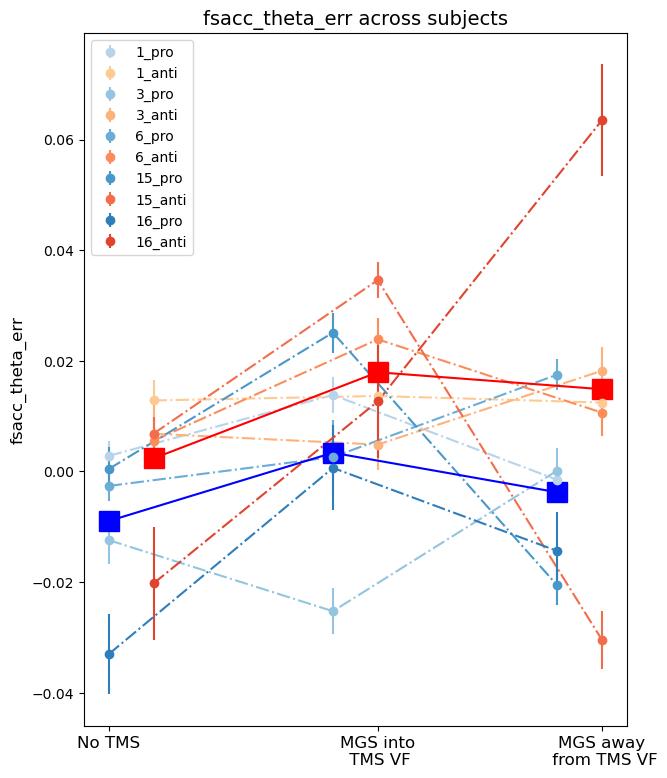

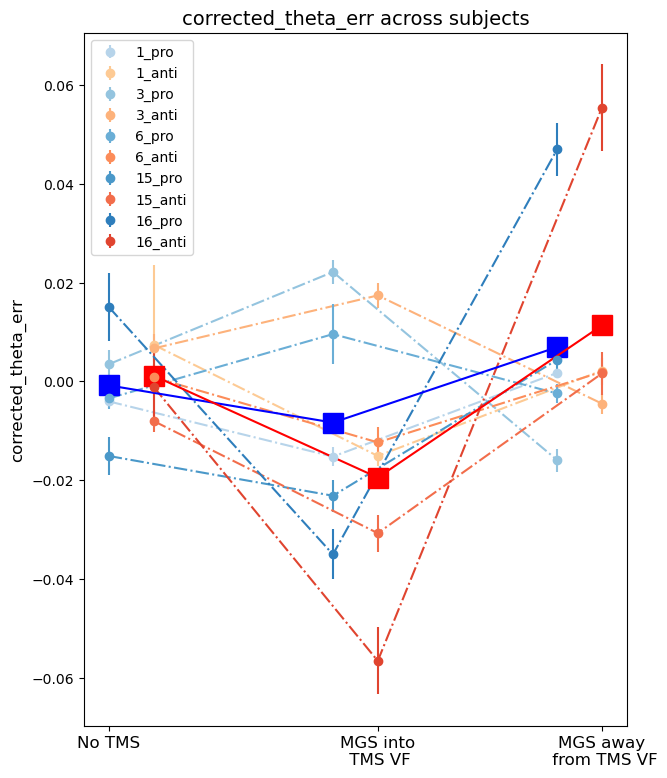

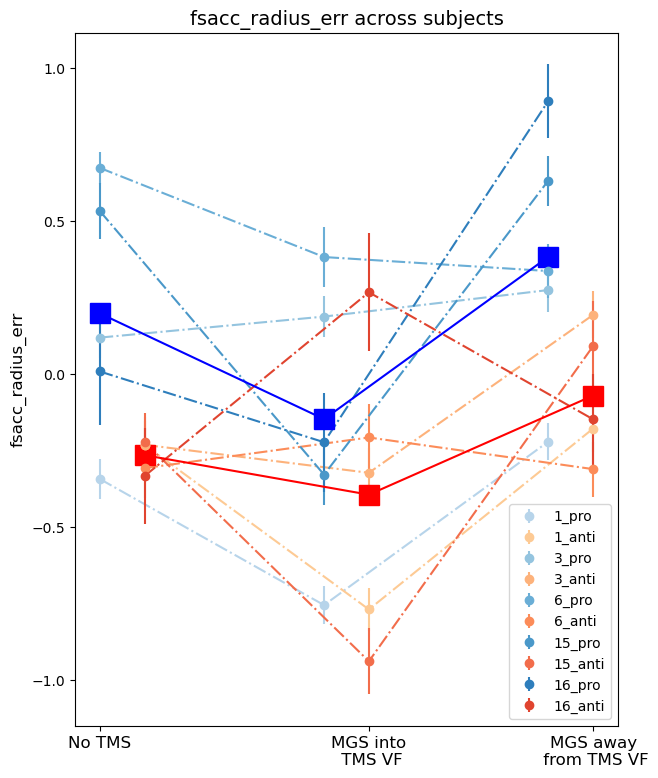

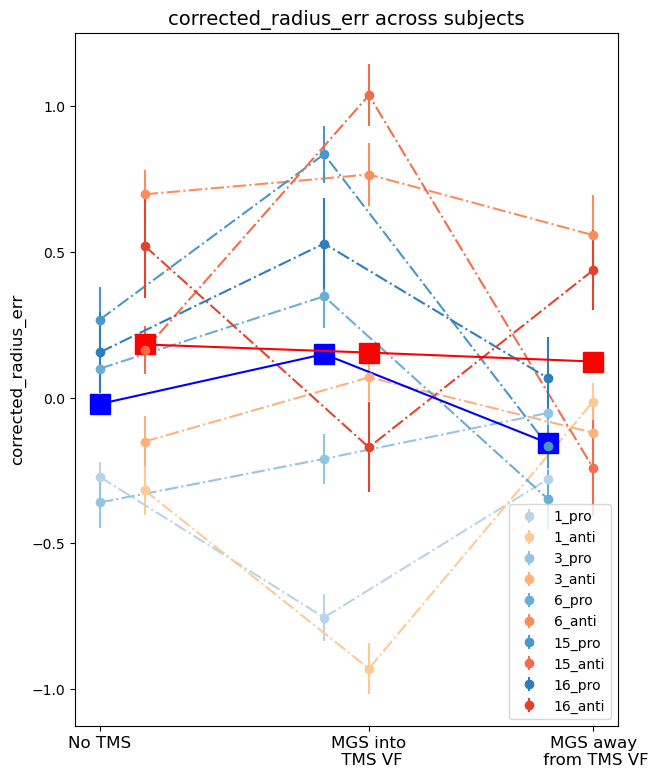

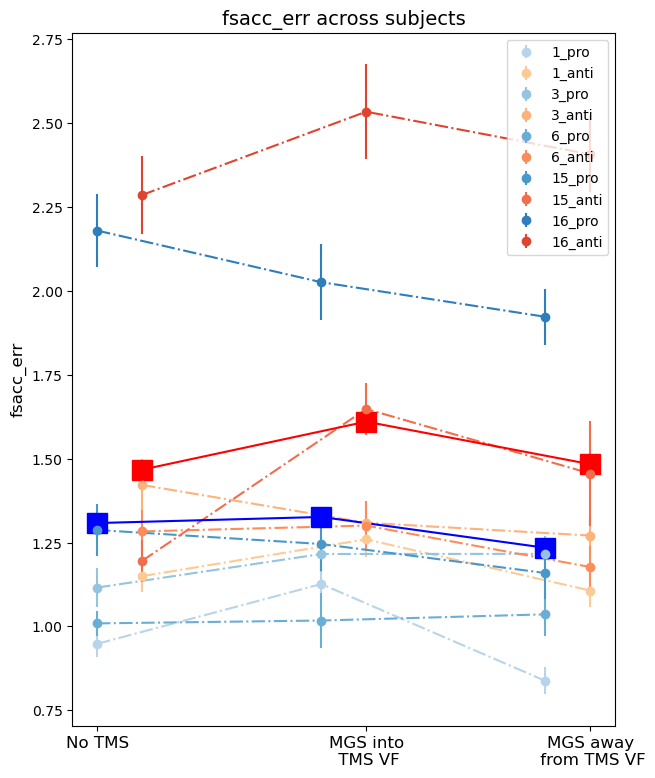

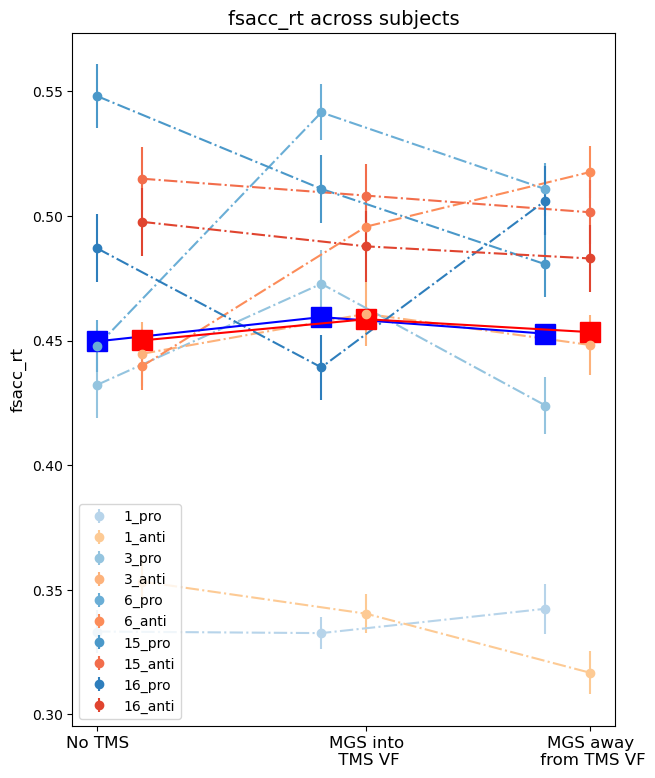

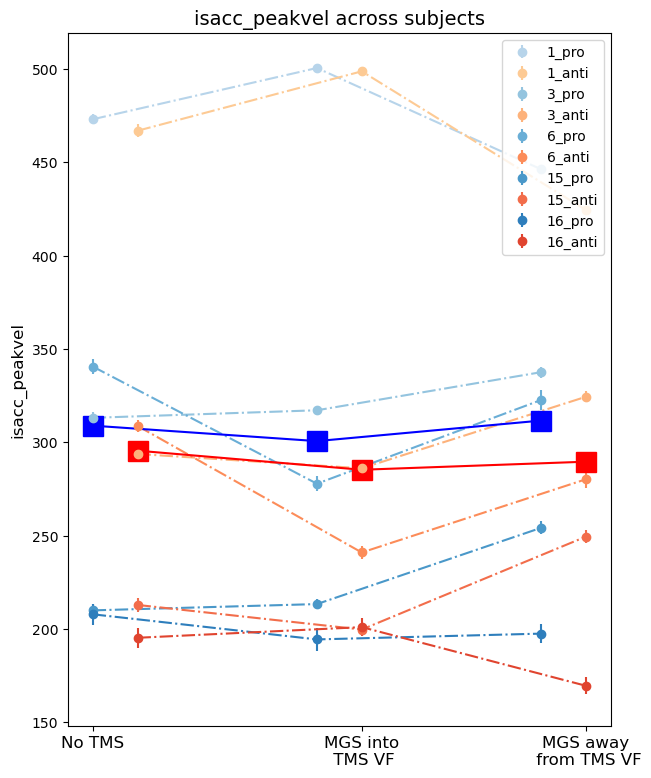

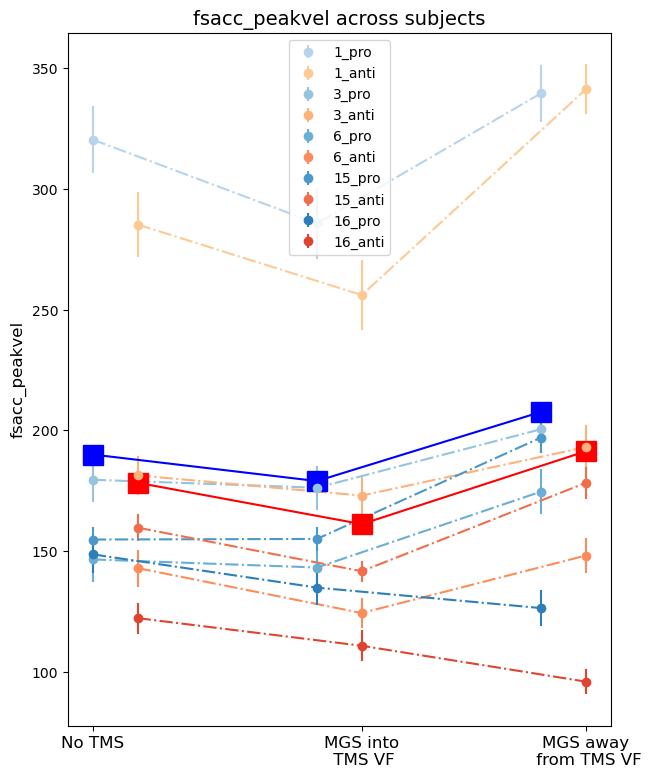

In [8]:
subject_wise_error_plot(df_filtered, 'fsacc_theta_err')
subject_wise_error_plot(df_filtered, 'corrected_theta_err')
subject_wise_error_plot(df_filtered, 'fsacc_radius_err')
subject_wise_error_plot(df_filtered, 'corrected_radius_err')
subject_wise_error_plot(df_filtered, 'fsacc_err')
subject_wise_error_plot(df_filtered, 'fsacc_rt')
subject_wise_error_plot(df_filtered, 'isacc_peakvel')
subject_wise_error_plot(df_filtered, 'fsacc_peakvel')

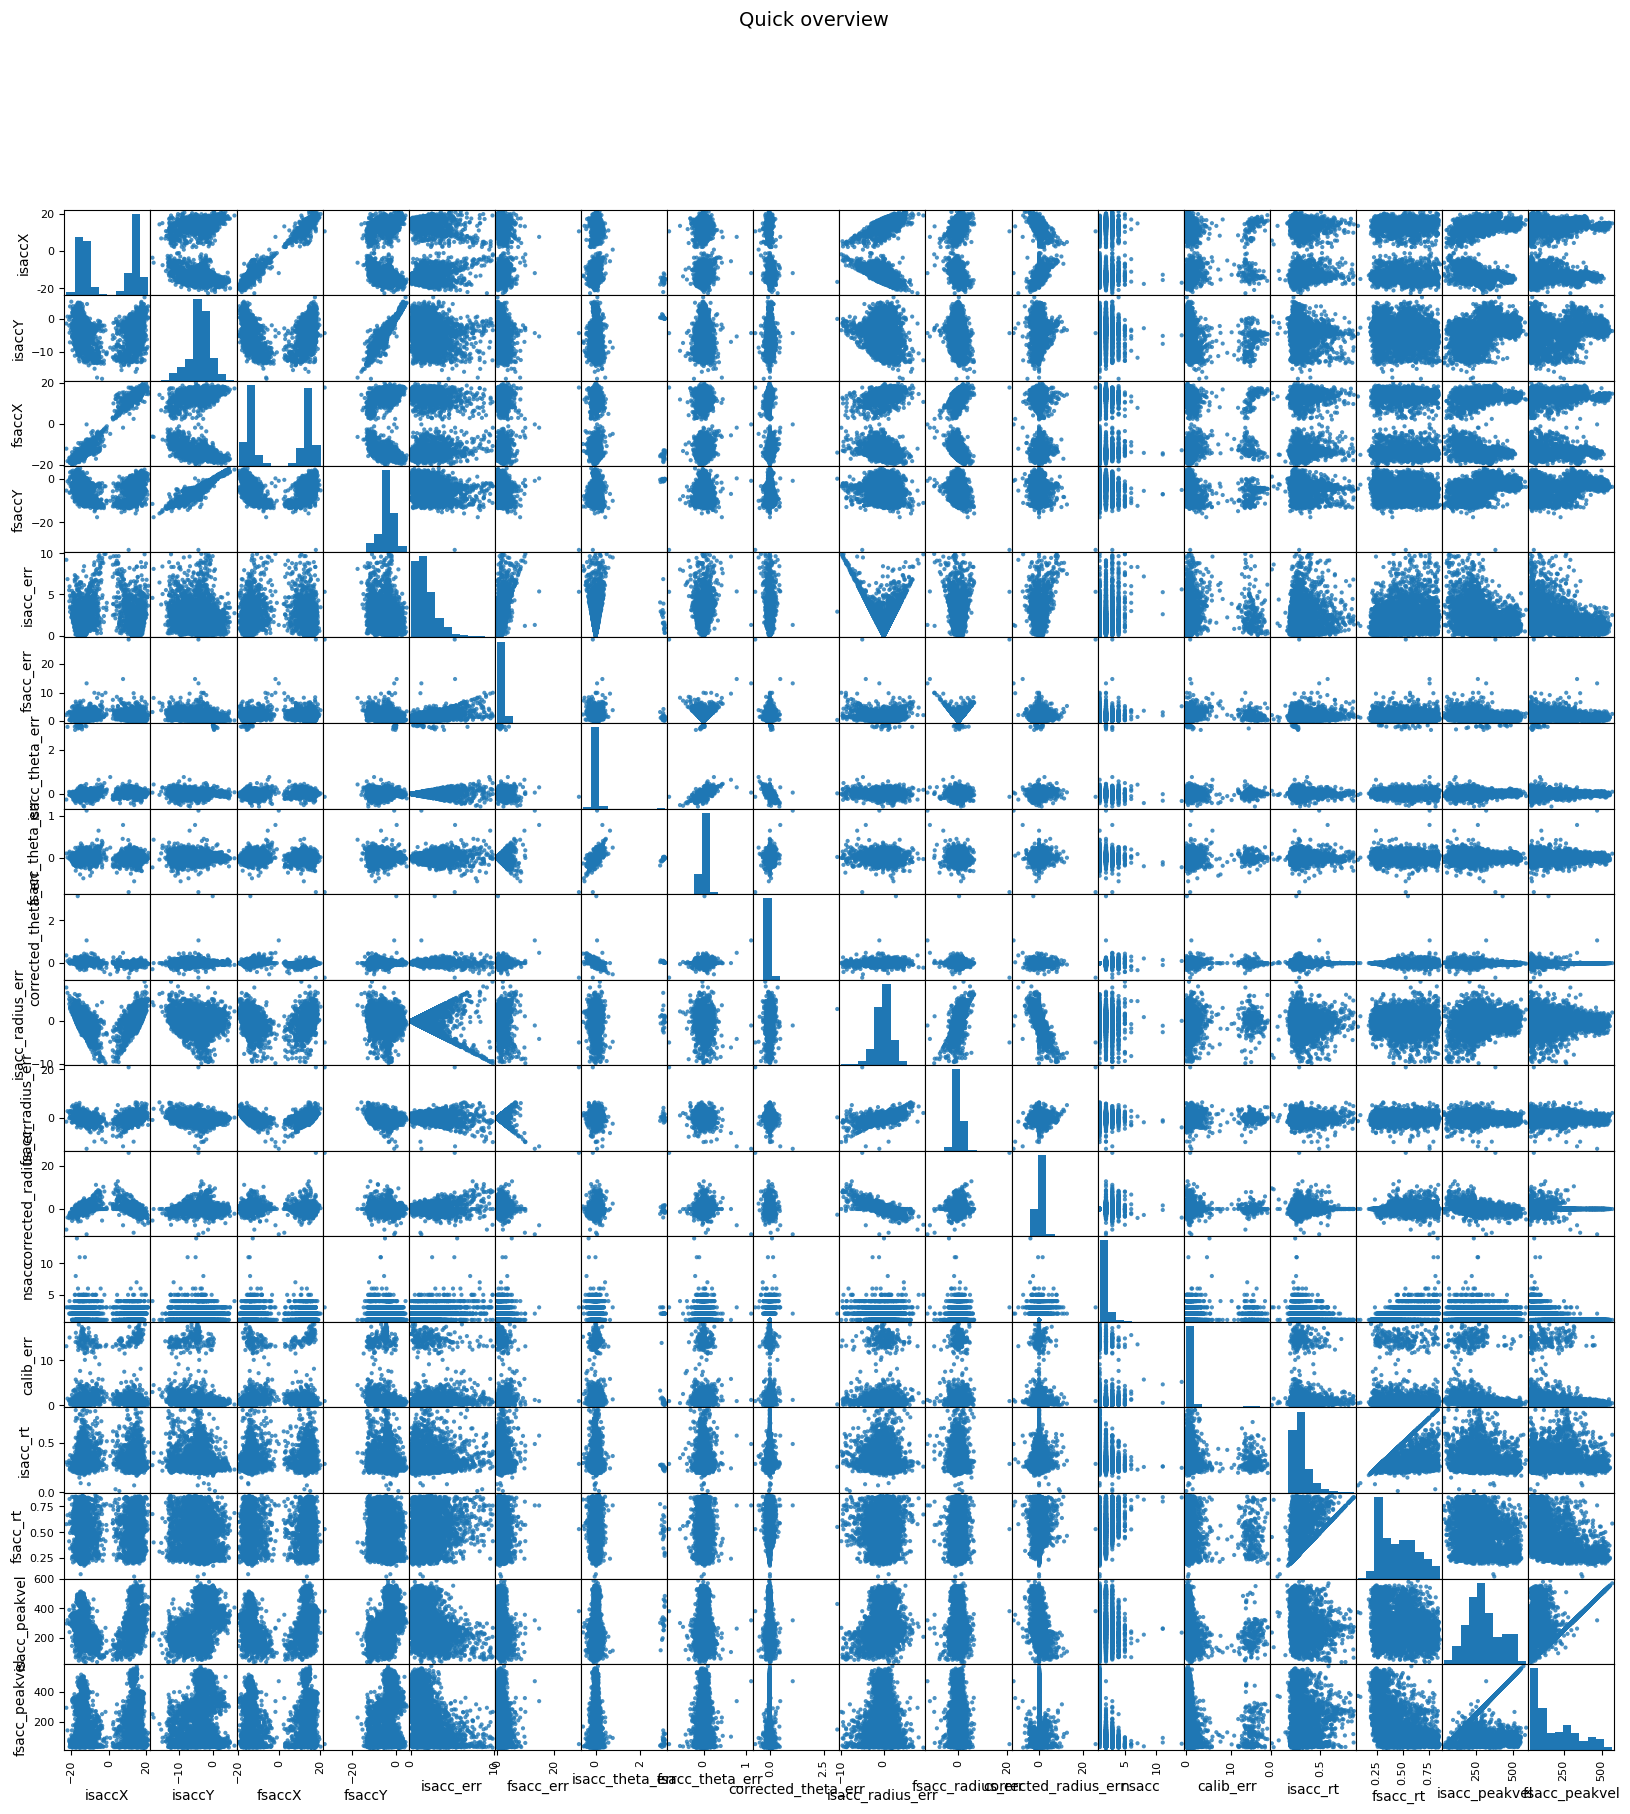

In [9]:
quick_visualization(df_filtered)

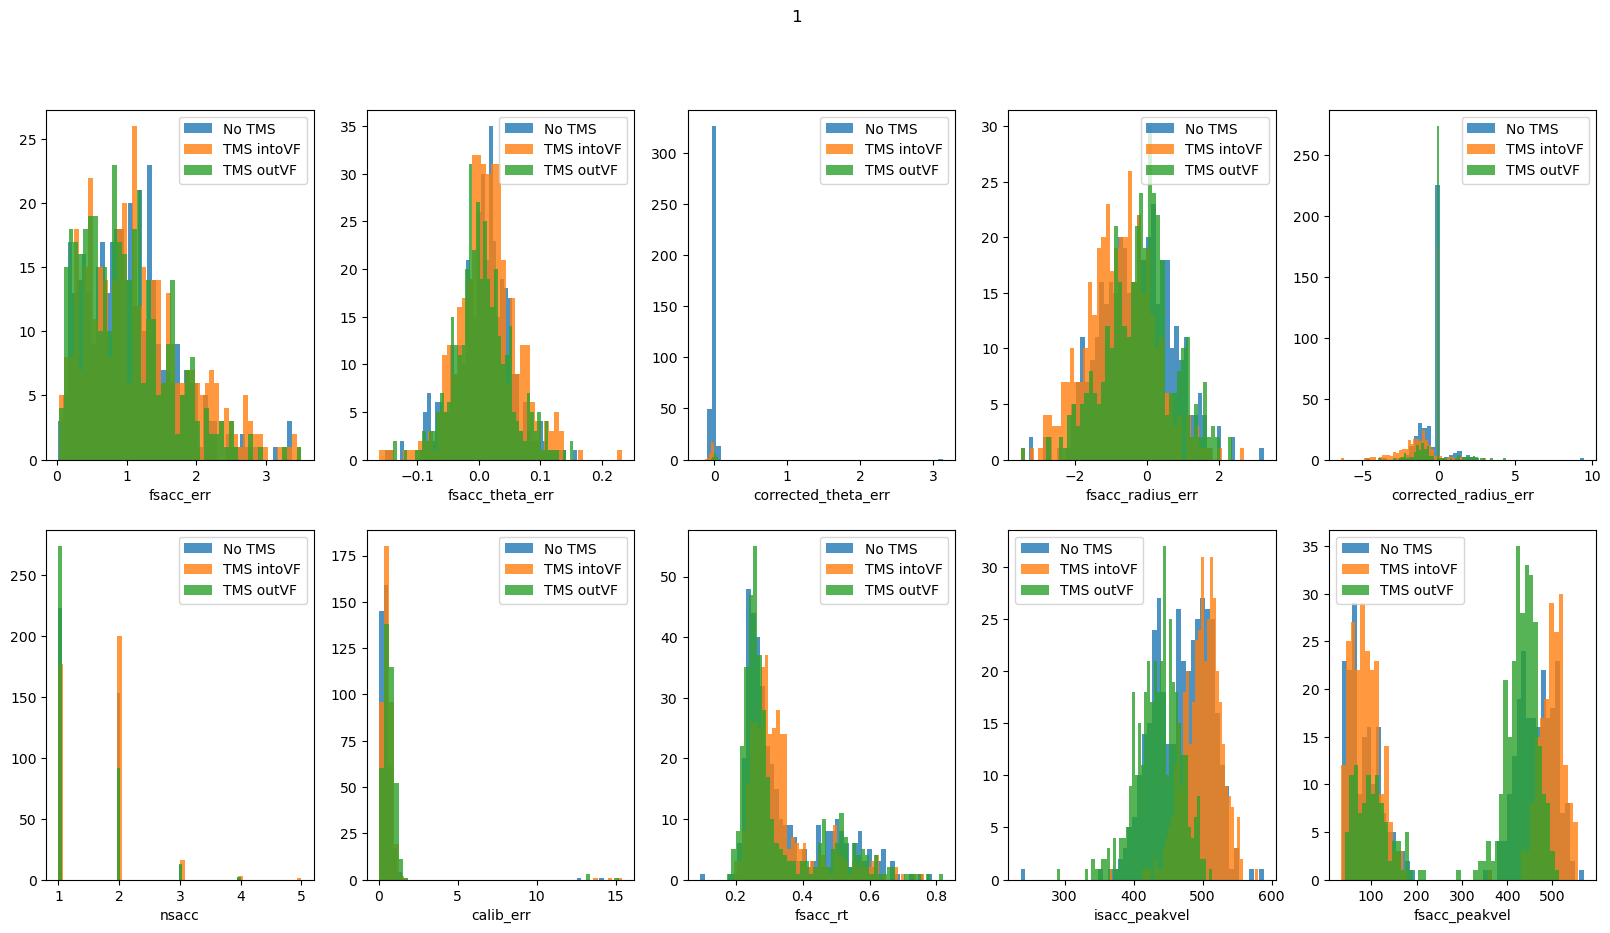

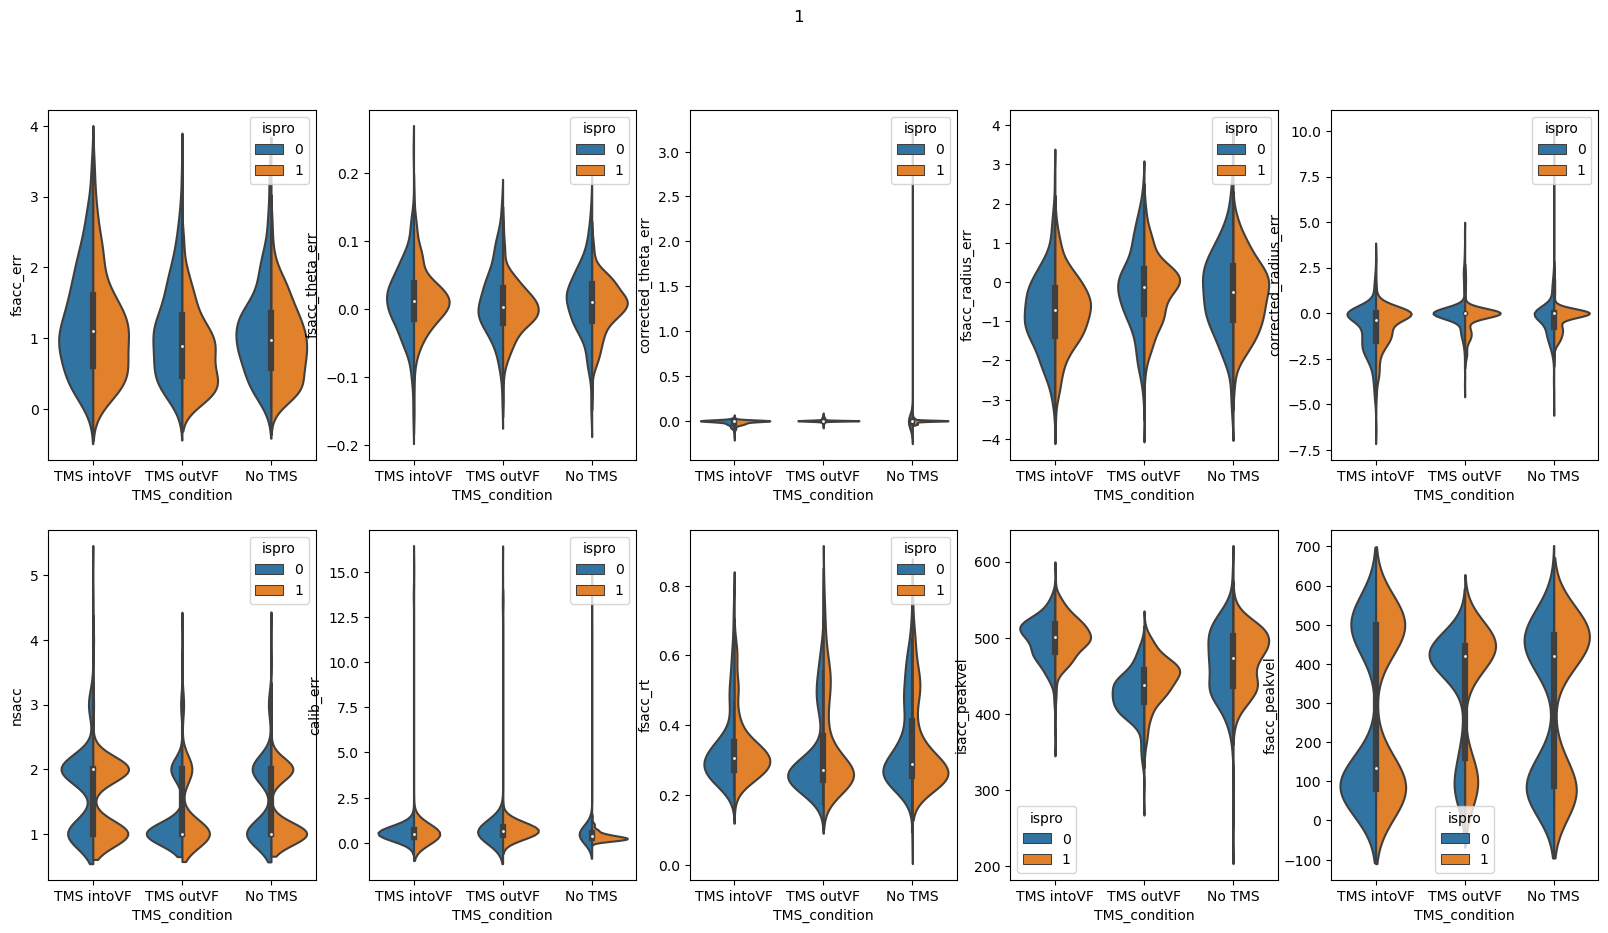

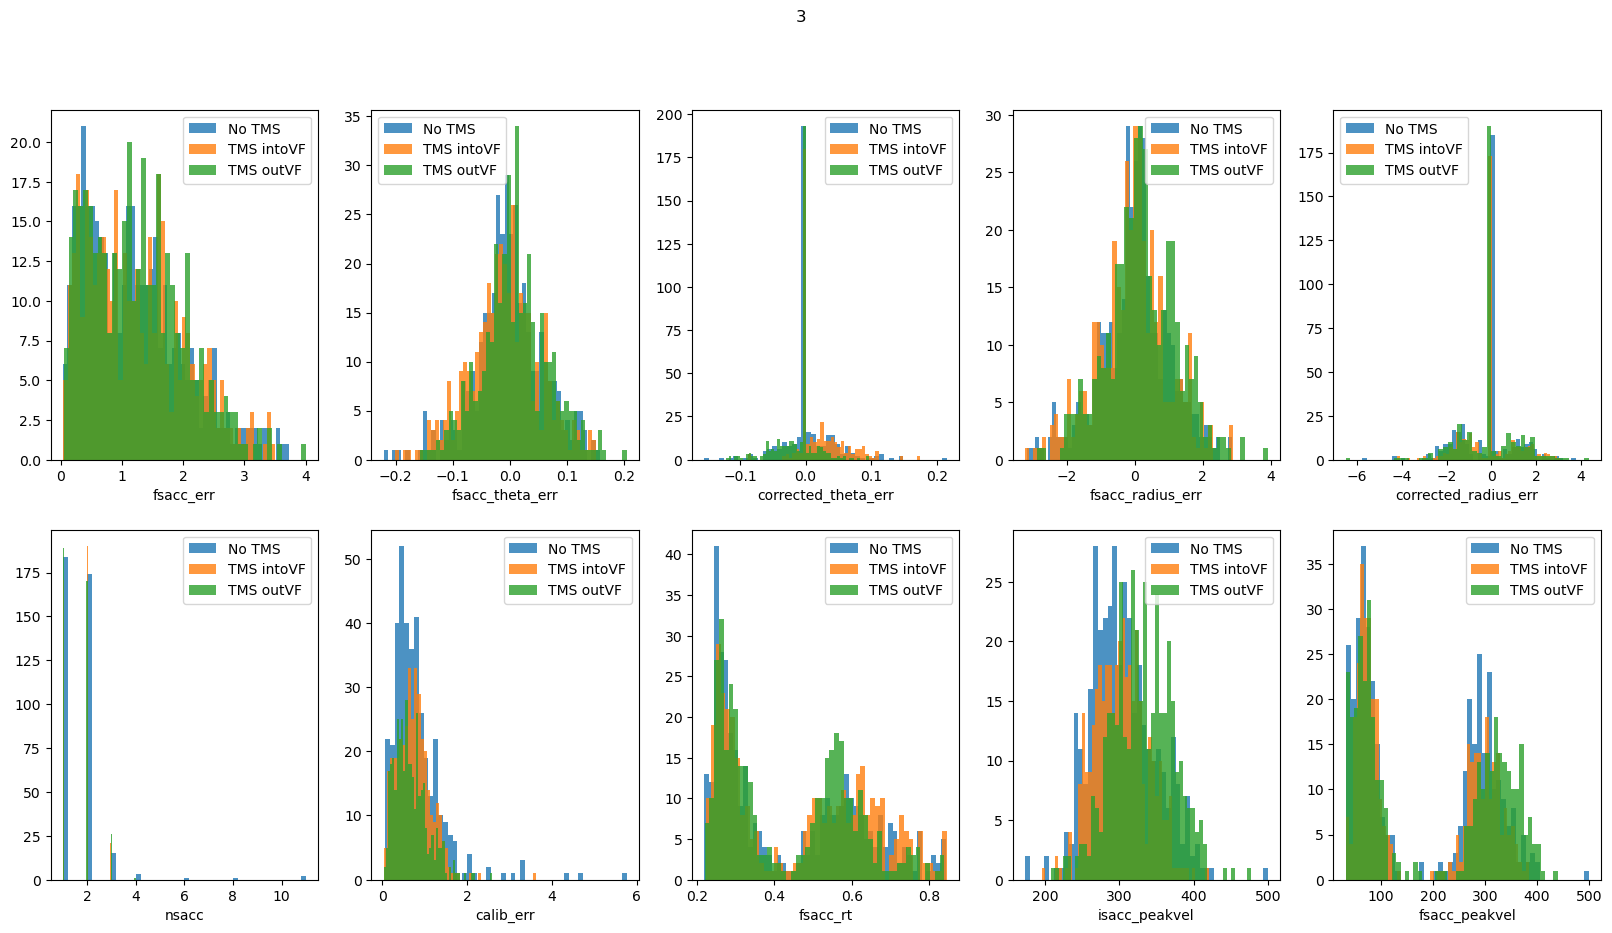

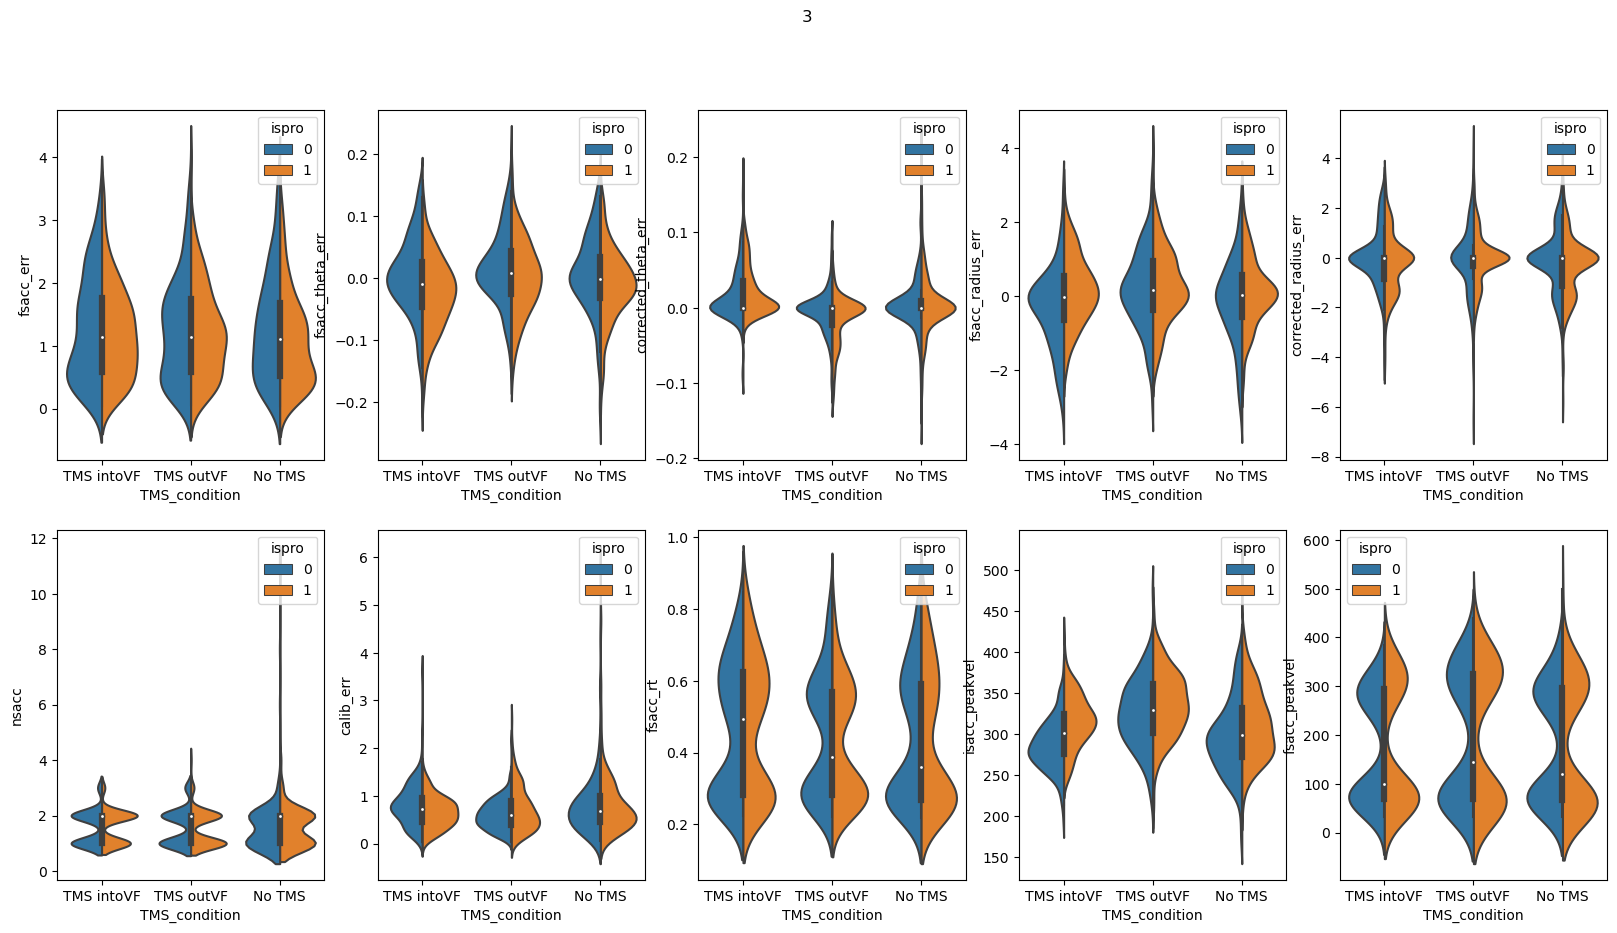

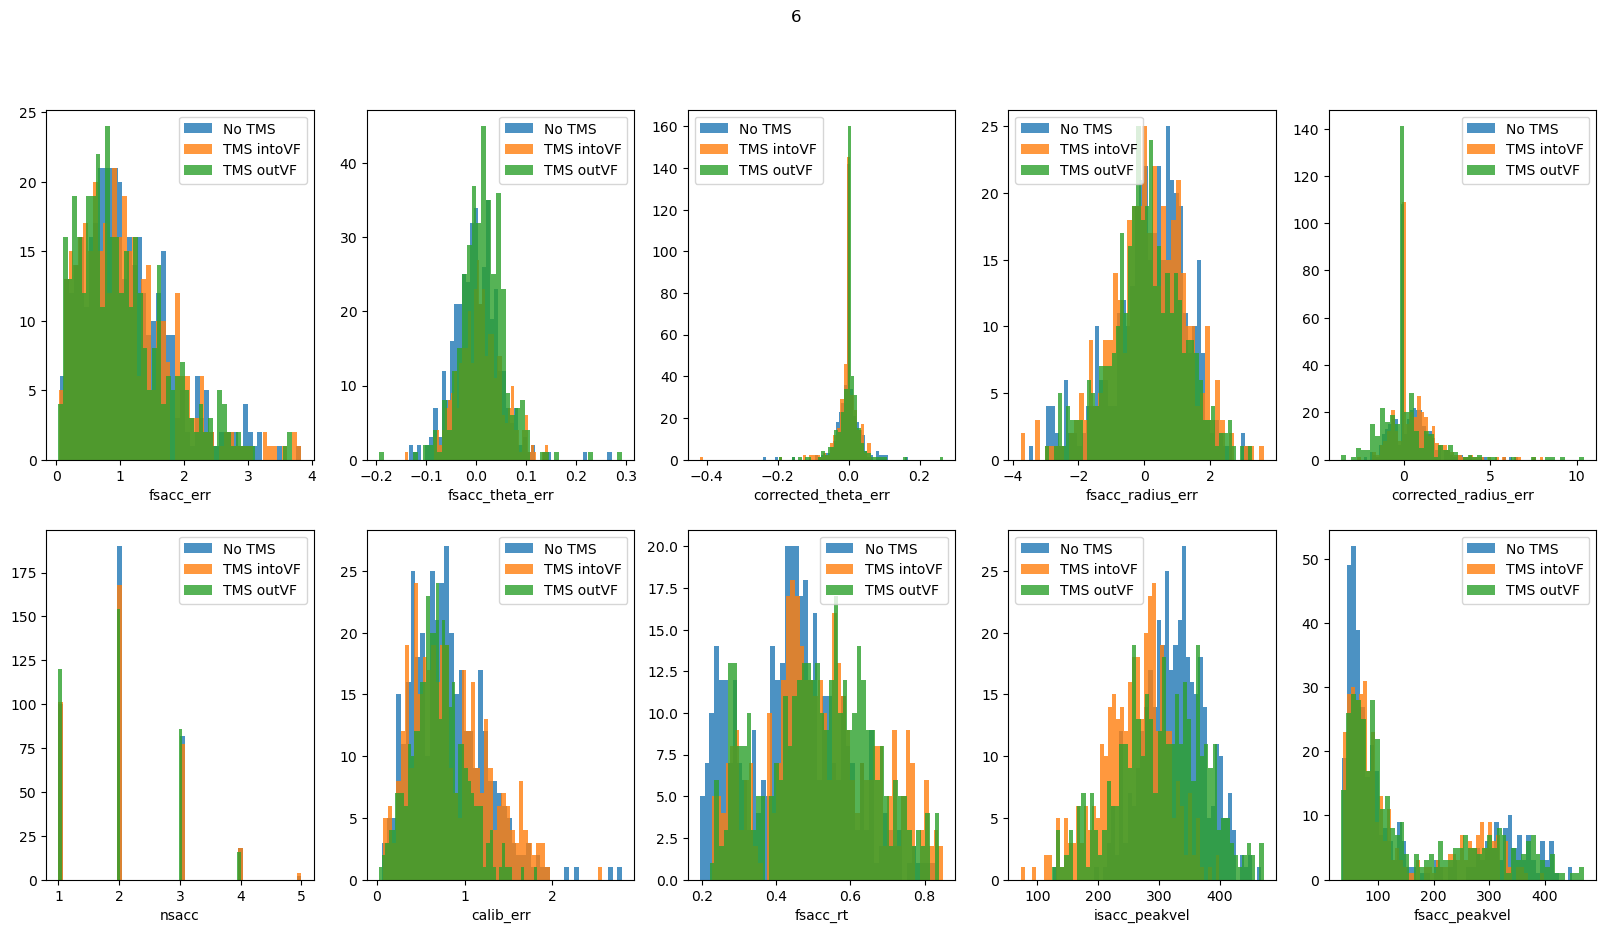

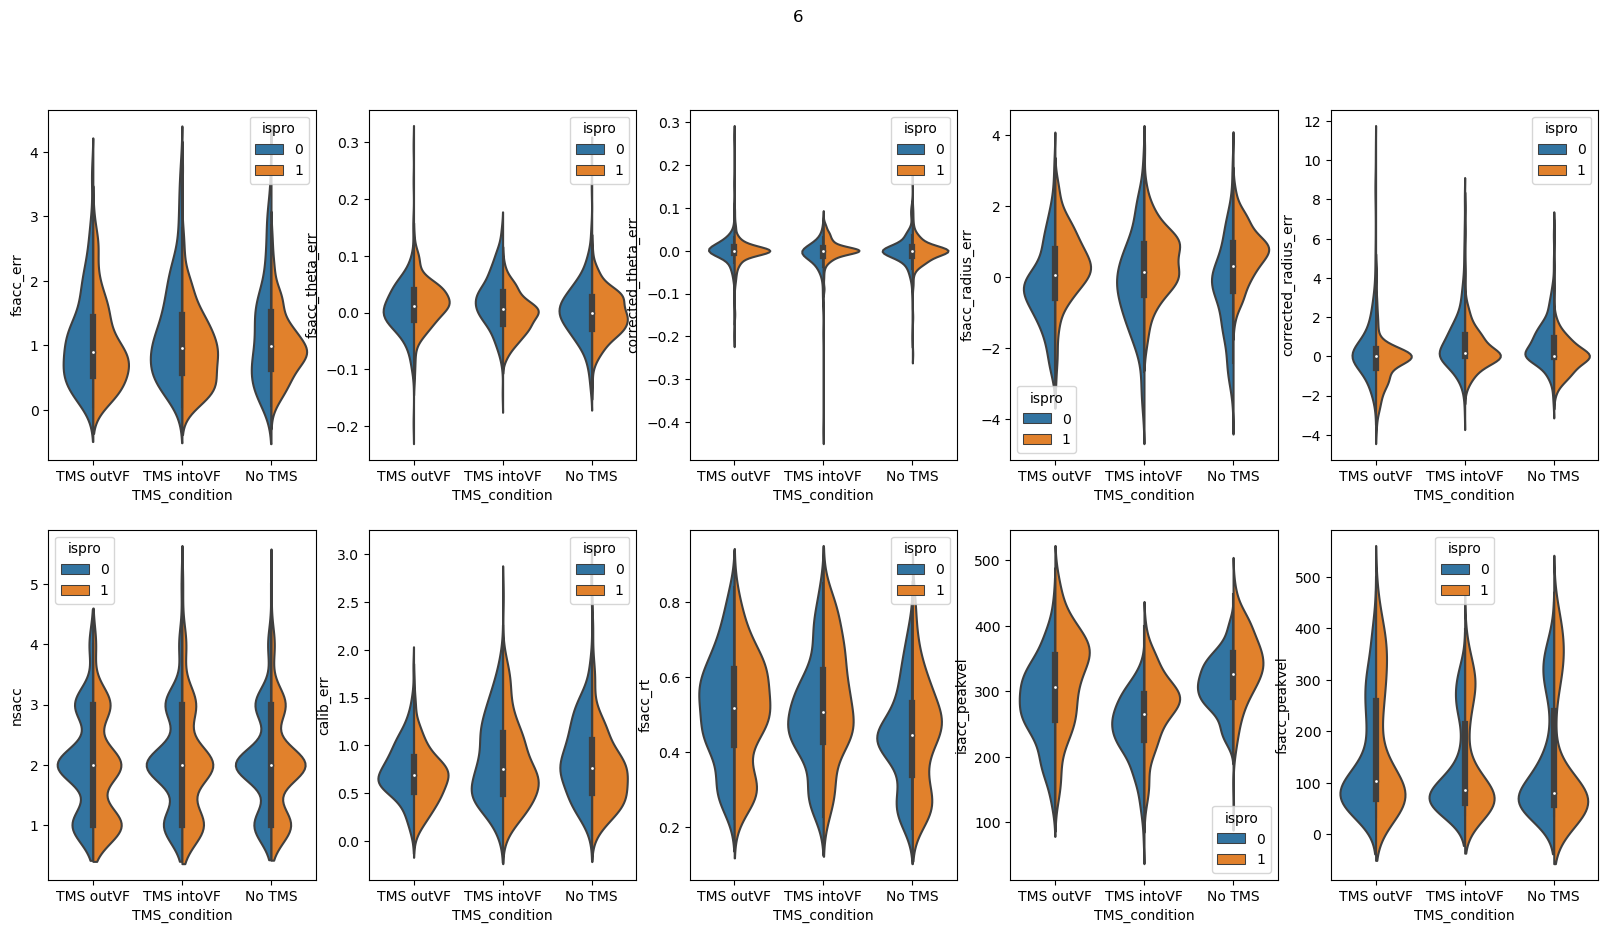

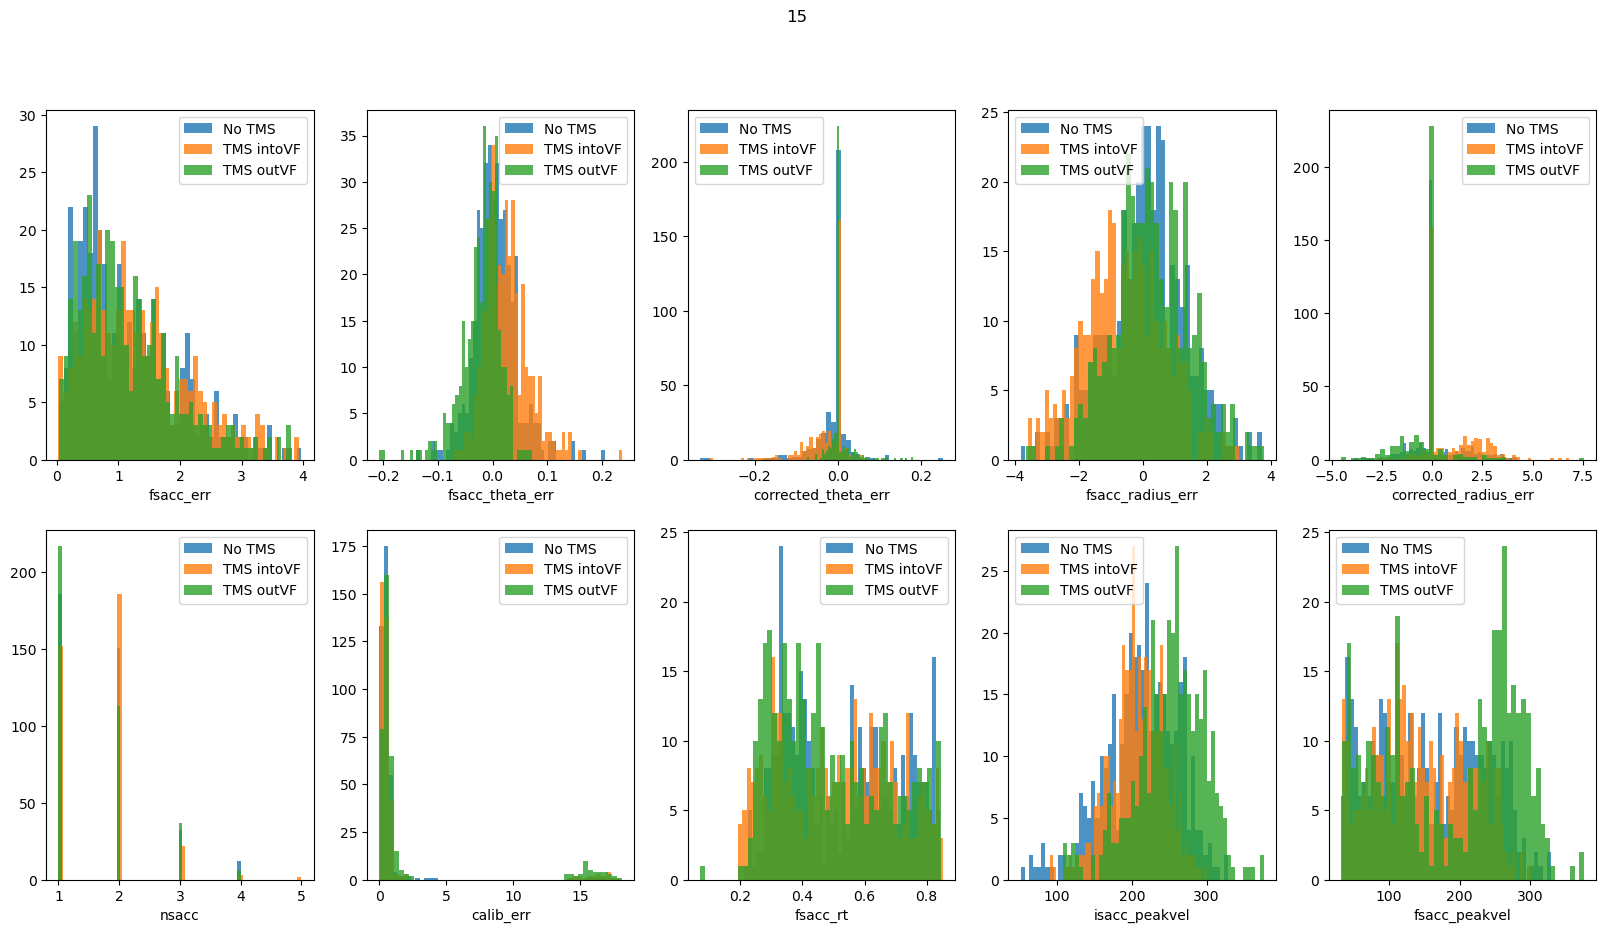

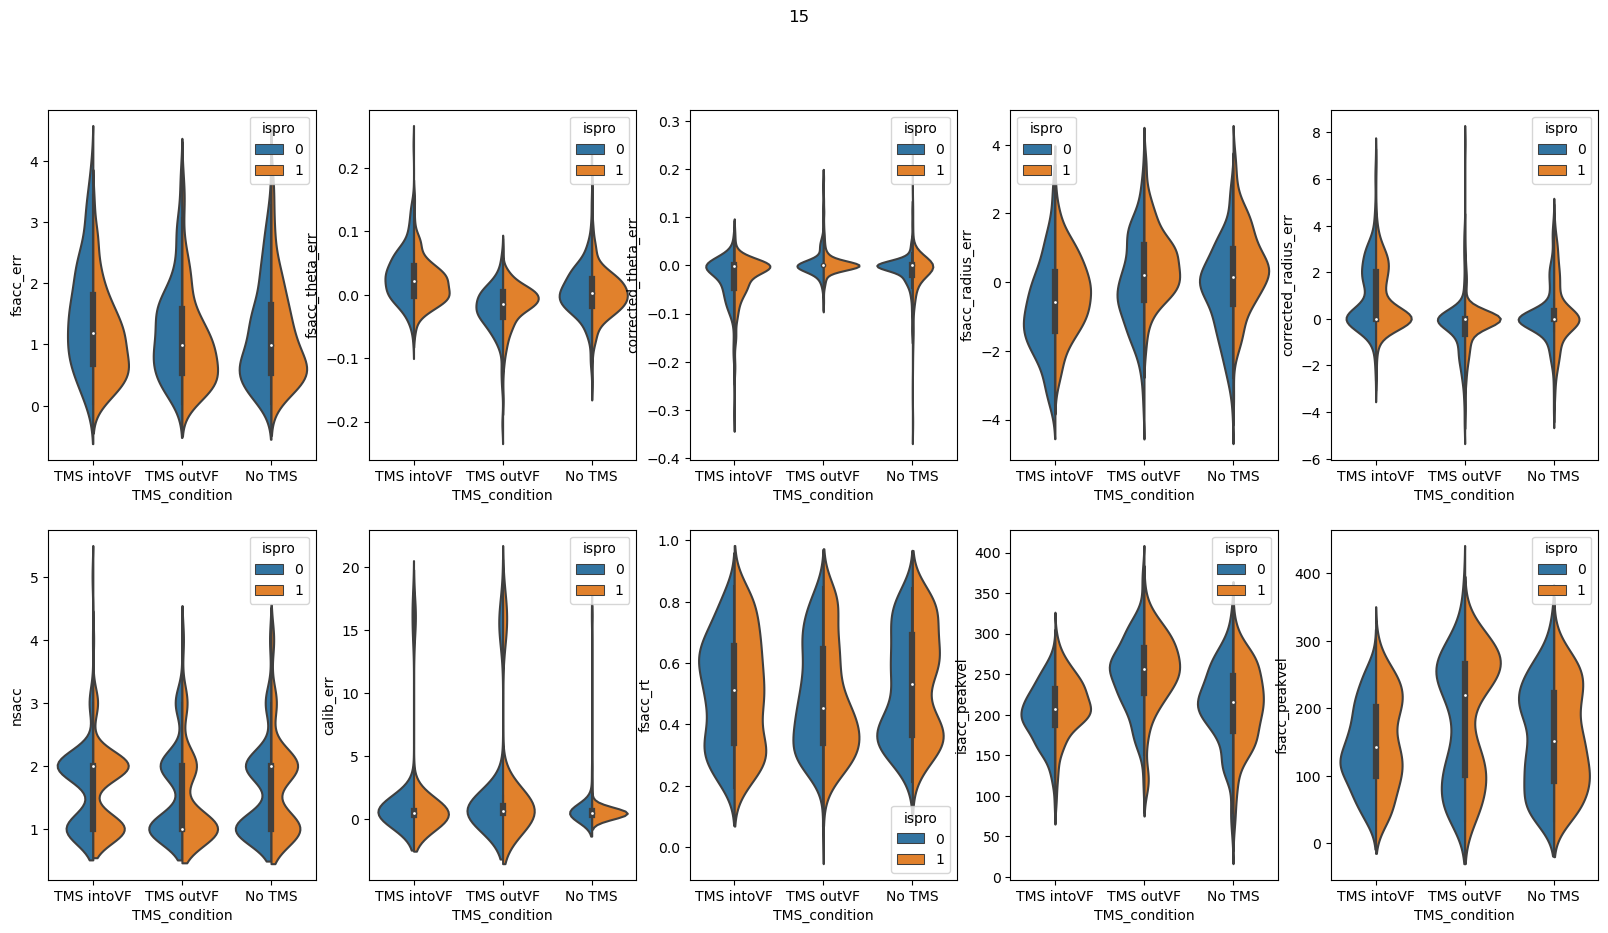

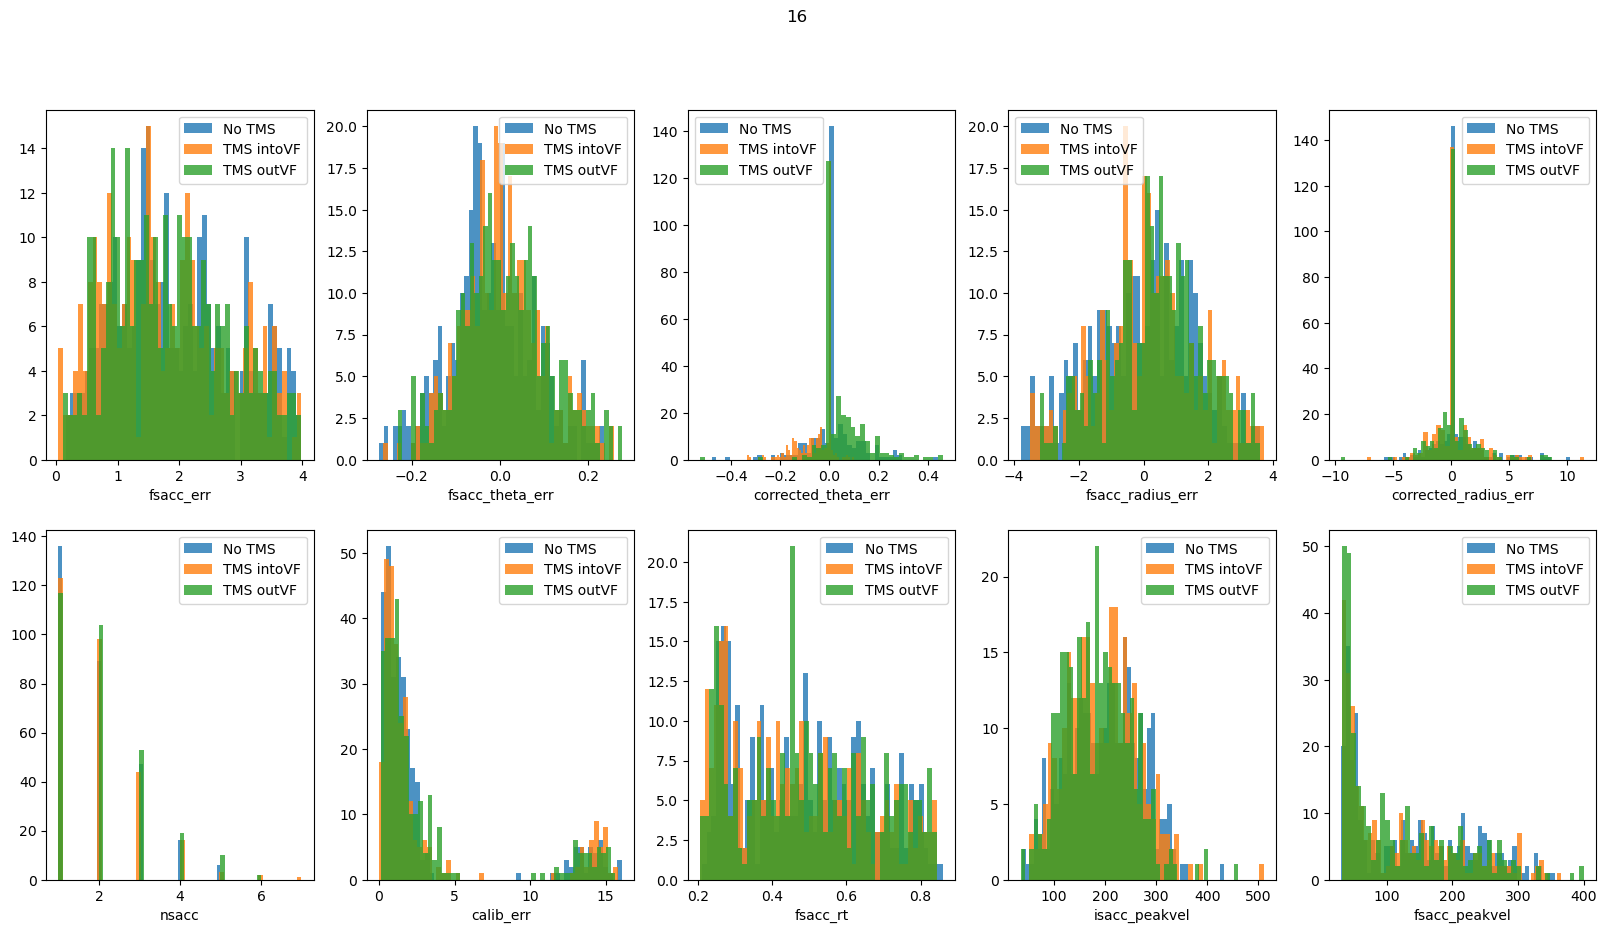

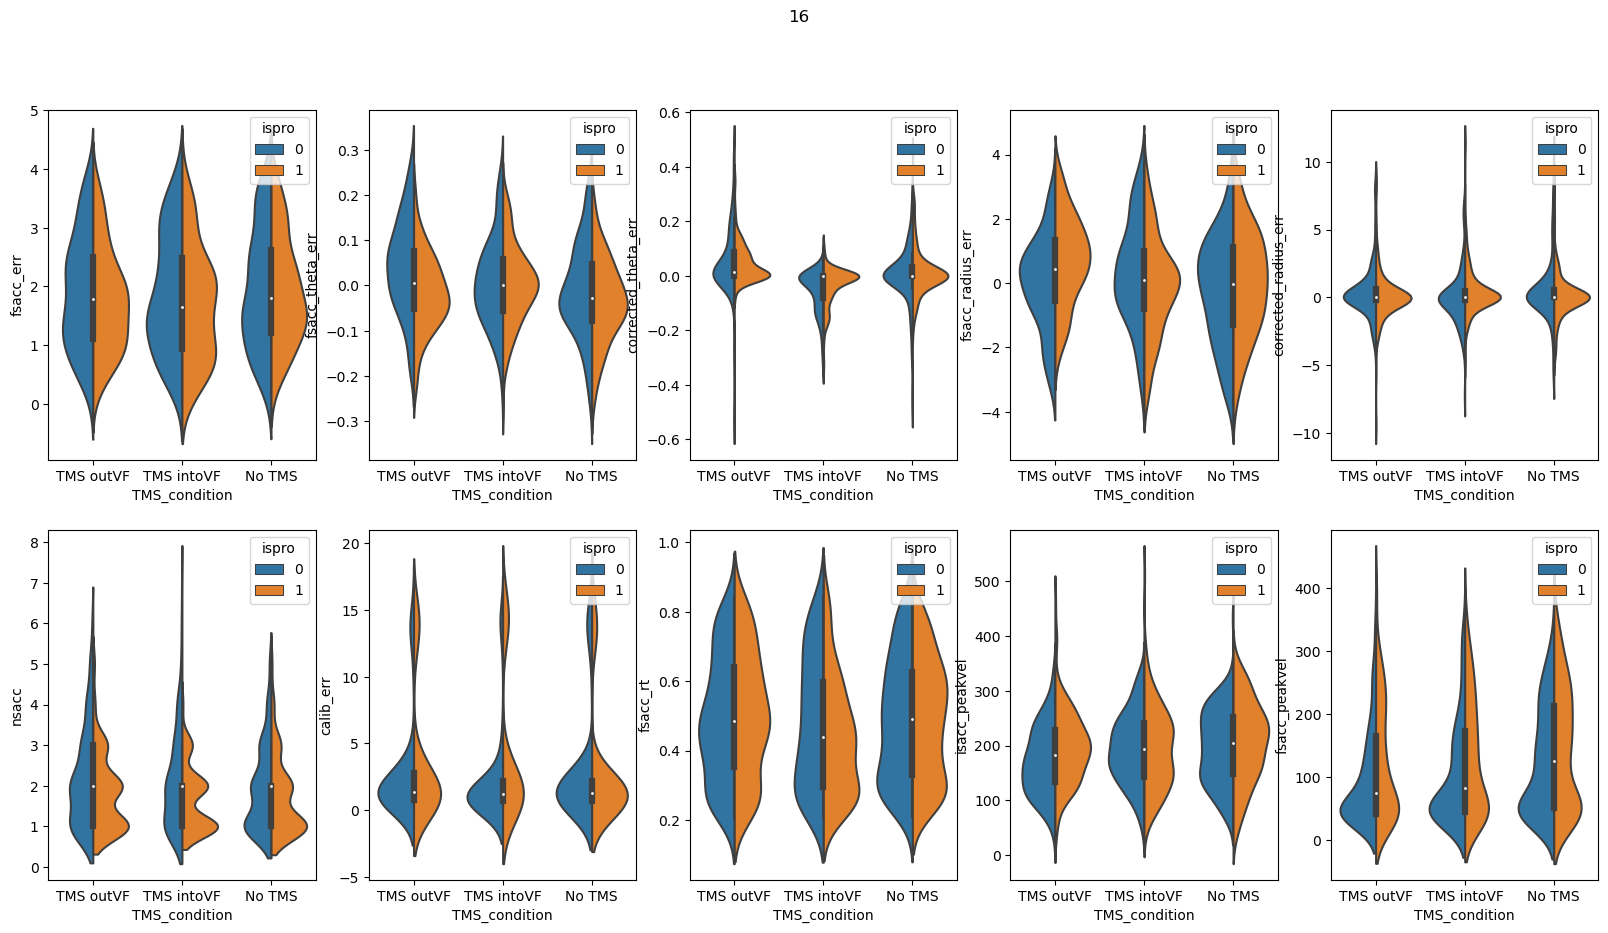

In [10]:
distribution_plots(df_filtered)